<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/test1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [2]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [4]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [6]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [7]:
feature_selected=['Min_IRM', 'Amp1_TempJ', 'Max_TempN', 'VarT_ann_NDVI', 'Var_EVI','ProfAbs_Sub', 'IR_Moy', 'Rad_Mai', 'Tmax_Fev', 'Tmax_Avril']
x_rfe=X[feature_selected]

In [8]:
 x_rfe

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
0,2690,96,14561,2,1,4143,1.968750,24920,21.799999,22.600000
1,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
2,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
3,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
4,2350,295,14719,1,35,6537,7.515625,24002,22.799999,24.700001
...,...,...,...,...,...,...,...,...,...,...
249,880,543,14675,52,47,0,25.093750,23341,15.400000,18.900000
250,1400,478,14743,51,7,846,6.578125,23582,15.500000,18.700001
251,1080,452,14666,84,70,1729,15.914062,23425,15.500000,18.900000
252,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999


In [64]:
# split into train test sets
X_train, X_val, y_train, y_val = train_test_split(x_rfe, Y, test_size=0.20)

In [65]:
X_train

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
91,1320,629,14549,73,73,233,3.484375,23363,18.0,20.600000
187,1760,662,14695,34,13,2711,15.195312,24576,15.8,21.100000
59,1010,555,14567,6,10,579,88.492188,24040,11.5,17.000000
123,1680,509,14723,7,11,599,0.757812,23822,19.0,21.900000
250,1400,478,14743,51,7,846,6.578125,23582,15.5,18.700001
...,...,...,...,...,...,...,...,...,...,...
177,2670,504,14635,34,11,2239,6.476562,22883,20.0,23.299999
214,1360,423,14658,75,14,1870,1.710938,24053,18.0,20.299999
234,2110,664,14587,50,6,606,38.984375,23471,11.9,17.900000
218,970,442,14712,70,7,561,5.171875,23816,17.1,19.500000


In [66]:
X_val

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
159,3110,728,14836,2,1,5965,1.945312,24921,19.700001,25.900000
116,1510,642,14635,75,49,1446,10.796875,23720,17.799999,21.799999
121,1980,734,14610,61,56,3304,2.492188,23815,17.400000,21.100000
155,1980,720,15025,17,1,3778,17.531250,25288,19.700001,26.299999
82,1080,513,14644,79,60,2892,10.968750,23769,17.600000,20.000000
64,1280,624,14798,62,15,0,3.734375,23688,18.600000,23.299999
184,2520,657,15112,67,5,11884,7.484375,24839,21.600000,27.600000
168,3210,337,14619,20,2,179,7.156250,22377,22.200001,25.299999
215,1460,503,14659,74,58,2820,3.601562,23746,17.500000,19.700001
67,1450,547,14807,34,30,0,1.945312,23673,20.600000,24.600000


In [67]:
Classifier = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)

In [68]:
Classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [69]:
preds = Classifier.predict(X_val)

In [70]:
preds

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [71]:
preds = Classifier.predict(X_val)

In [72]:
preds

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [73]:
cf_matrix = confusion_matrix(y_val, preds)
print(cf_matrix)

[[22  4]
 [ 8 17]]


In [74]:
###Recall
def recall(y_val, preds):
  recall=recall_score(y_val, preds)
  return recall
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### MCC
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### sensibilite
def sensibilite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_val, preds):
  value = cohen_kappa_score(y_val,preds)
  return value
### balancedacc
def balancedacc(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  value = (sen + spe)/2
  return value
def présicion_positive(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [75]:
MCC(y_val, preds)

0.5344402432698848

In [ ]:
recall(y_val, preds)

0.7

In [ ]:
sensibilite(y_val, preds)

0.7

In [ ]:
specifite(y_val, preds)

0.8064516129032258

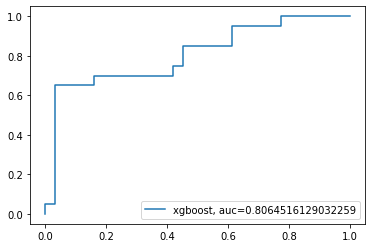

In [ ]:
y_pred_proba = Classifier1.predict_proba(X_val4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [115]:
# split into train test sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(x_rfe, Y, test_size=0.20)

In [116]:
X_train1

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
54,1720,378,14741,60,19,858,42.476562,23454,18.200001,20.900000
163,2630,458,14932,14,0,1153,13.445312,23613,22.900000,27.700001
70,1990,592,14788,17,5,0,12.671875,23932,19.400000,23.799999
222,1140,502,14506,75,28,1929,3.421875,23640,18.100000,21.000000
212,1090,682,14552,77,202,1030,2.203125,23347,17.500000,20.400000
...,...,...,...,...,...,...,...,...,...,...
213,1090,549,14607,82,143,1856,2.570312,23609,17.900000,20.299999
230,1330,723,14857,70,107,10,12.679688,23688,16.900000,21.900000
26,1840,333,14637,33,32,3374,2.703125,23453,19.400000,21.799999
80,1040,539,14698,74,26,5687,1.937500,23769,18.100000,20.900000


In [117]:
X_val1

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
62,1610,622,14826,61,21,0,2.281250,23711,19.100000,23.600000
204,3710,694,14533,14,1,3539,4.054688,24376,12.700000,19.200001
189,2310,470,14698,31,15,9148,2.515625,23370,21.100000,24.500000
63,1630,631,14826,60,21,0,2.890625,23762,18.799999,23.400000
226,1670,374,14631,71,32,1742,14.750000,23941,17.000000,20.000000
27,1090,292,14638,53,19,3325,5.632812,23505,19.299999,21.700001
126,2190,614,14691,52,27,2098,6.117188,23550,18.500000,21.700001
207,2070,656,14532,14,7,0,30.984375,23954,11.700000,18.299999
37,1990,460,14640,52,32,3395,2.226562,23362,21.100000,24.500000
49,2660,443,14605,26,9,1505,8.835938,23477,21.500000,24.500000


In [118]:
Classifier1 = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)

In [119]:
Classifier1.fit(X_train1,y_train1)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [120]:
preds1 = Classifier1.predict(X_val1)

In [121]:
preds1

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [122]:
cf_matrix = confusion_matrix(y_val1, preds1)
print(cf_matrix)

[[20  3]
 [10 18]]


In [123]:
MCC(y_val1,preds1)

0.5180846576681183

In [124]:
recall(y_val1, preds1)

0.6428571428571429

In [129]:
sensibilite(y_val1, preds1)

0.6428571428571429

In [130]:
specifite(y_val1, preds1)

0.8695652173913043